In [1]:
from src.data_split import *
from src.feature_engineering import *
from src.matrix_tools import *
from src.linear_models import *
from src.opti_tools import *

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/insurance.csv')

In [16]:
encoder = OH()
split = RandomSplit()
PCA = PrincipalComponentAnalysis() # Question : Why if i apply PCA on the entire dataset (target included) I get a perfect score? --> Data leakage
log = LogTransformation()
Std = Standardization()

df = encoder.apply_transformation(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [24]:
X_train, X_test, y_train, y_test = split.split_data(df,target='charges')
X_test = Std.apply_transformation(X_test)
X_train = Std.apply_transformation(X_train)
#X_train = log.apply_transformation(X_train)
#X_test = log.apply_transformation(X_test)

In [25]:
#model = LassoRegression()
#theta = model.train_model(X_train, y_train,1,0.01,10000)

model = RidgeRegression()
theta = model.train_model(X_train, y_train,1)

#model = LinearRegression_test()
#theta = model.train_model(X_train, y_train)

y_pred=model.predict(X_test, theta)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

MSE: 33614739.37743006
MAE: 4183.264619887932
R2: 0.7834781704531268


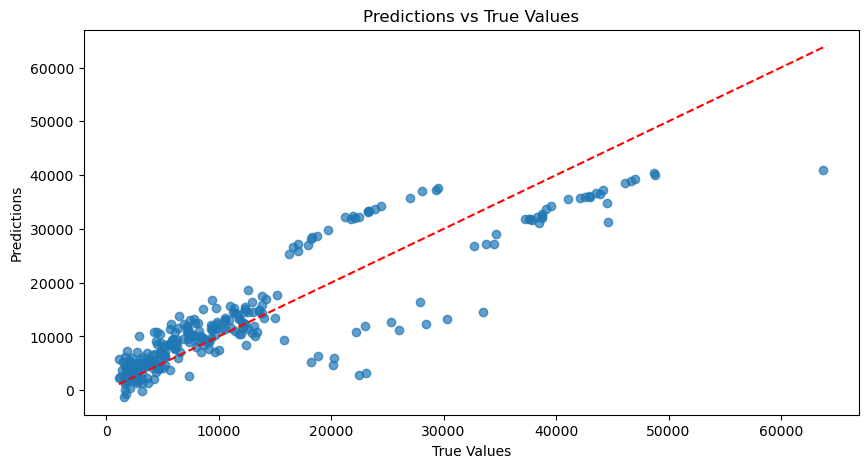

In [27]:
# Visualiser les prédictions par rapport aux valeurs réelles
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')
plt.show()

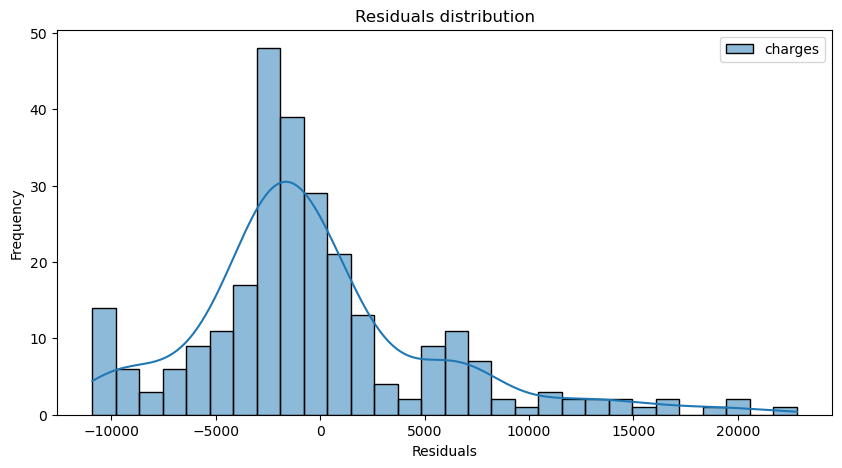

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(y_test-y_pred, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals distribution')
plt.show()